# Recursive Functions

© Explore Data Science Academy

## Learning Objectives
By the end of this train, you should be able to:

* Understand recursion and its uses;
* Implement basic recursive functions; and
* Understand the difference between iterative and recursive functions.

## Outline
In this train we will:

* Introduce the concept of recursion;
* Implement basic recursive functions; and
* Compare the iterative and recursive implementations of merge sort.

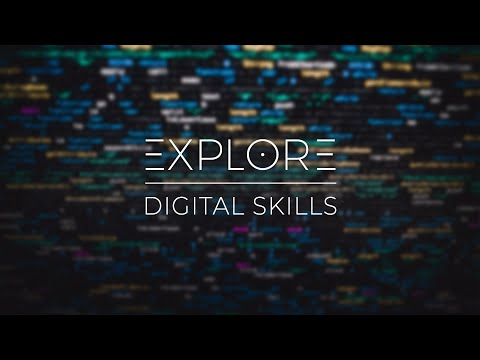

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('_0v1WjecTSs', width=940, height=500)

## Recursion

Recursion can offer some sublime solutions to certain problems, especially those that can be broken up into similar but smaller problems. Please read Beau Carnes' [Recursion primer](https://medium.freecodecamp.org/how-recursion-works-explained-with-flowcharts-and-a-video-de61f40cb7f9) for an introduction that includes a brilliant example involving a set of keys, boxes, and a small child.

Recursion, or a recursive function to be precise, is a function which calls itself within the function. This concept can be tricky to grasp, so let's begin with some non-programming examples. Think of it like dream levels in [Inception](http://www.imdb.com/title/tt1375666/), but instead of a dream within a dream within a dream, recursion might be a function call within a function call within a function call.

### Recursive Acronyms

An acronym is a word formed from an abbreviation of words or phrases. NumPy is an acronym for _Numerical Python_ and Pandas is short for *Python ANd Data AnalysiS*. 

Computer scientists find great joy in *Recursive Acronyms*: 
* The popular website scripting language **PHP** is short for _PHP: Hypertext Preprocessor_ 
* Python's package manager **PIP** is short for _PIP Installs Packages_

These are recursive because the definition of the acronym contains the acronym.

### Recursive functions

Consider the image below. This is a demonstration of recursion.

![Handsy](https://photos.smugmug.com/Art/The-Droste-Effect/i-Nnk5bWT/2/dee5915f/L/x-L.jpg)

Each arm has a function; it draws a slightly smaller arm that is capable of drawing a slightly smaller arm that is capable of drawing a slightly smaller arm, etc. Note that each arm's form and the function recurs for each new arm. Thankfully, each new arm is slightly smaller than it's creator. There will come an arm so small it no longer functions and cannot create another arm. If this weren't the case, there would be an infinite number of arms; all the way down!

Recursive functions need two things to recur: a *recursive case*, for which the function calls itself, and a *base case* or *terminating condition* for which the function does **not** call itself.

Consider the screenshot below. It also demonstrates recursion; this time with a predefined base case.

![Droste VLC](http://en-academic.com/pictures/enwiki/83/Screenshot_Recursion_via_vlc.png)

It shows 
- an Ubuntu desktop which has a VLC window playing a 33:28.20 video of 
- an Ubuntu desktop which has a VLC window playing a 33:28.19 video of
- an Ubuntu desktop which has a VLC window playing a 33:28.18 video of
<br/> ...
<br/>...
- an Ubuntu desktop which has a VLC window playing a 00:00.02 video of
- an Ubuntu desktop which has a VLC window playing a 00:00.01 video.


Each window's function is to play a video of itself that is one second shorter than itself. The recursion stops when it tries to play a 00:00.00 video. We say that the _recursive case_ occurs each time the video is longer than 00:00.00. We say that the _base/terminating case_ occurs when the video is exactly 00:00.00.

### Base Case Example

The following code is taken from  Beau Carnes' [Recursion primer](https://medium.freecodecamp.org/how-recursion-works-explained-with-flowcharts-and-a-video-de61f40cb7f9). If you have not yet done so, please do go through it.

This countdown function is similar to the video example above. It demonstrates what may happen without a base case. Run the code, and wait for it to terminate. Read the error message for interest sake.

In [1]:
def countdown(i):
    print(i)
    countdown(i - 1)
    
countdown(5)

5
4
3
2
1
0
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-63
-64
-65
-66
-67
-68
-69
-70
-71
-72
-73
-74
-75
-76
-77
-78
-79
-80
-81
-82
-83
-84
-85
-86
-87
-88
-89
-90
-91
-92
-93
-94
-95
-96
-97
-98
-99
-100
-101
-102
-103
-104
-105
-106
-107
-108
-109
-110
-111
-112
-113
-114
-115
-116
-117
-118
-119
-120
-121
-122
-123
-124
-125
-126
-127
-128
-129
-130
-131
-132
-133
-134
-135
-136
-137
-138
-139
-140
-141
-142
-143
-144
-145
-146
-147
-148
-149
-150
-151
-152
-153
-154
-155
-156
-157
-158
-159
-160
-161
-162
-163
-164
-165
-166
-167
-168
-169
-170
-171
-172
-173
-174
-175
-176
-177
-178
-179
-180
-181
-182
-183
-184
-185
-186
-187
-188
-189
-190
-191
-192
-193
-194
-195
-196
-197
-198
-199
-200
-201
-202
-203
-204
-205
-206
-207
-208
-209
-210
-211
-212
-213
-214
-215
-216
-217
-218
-219
-

RecursionError: maximum recursion depth exceeded while calling a Python object

We avoid this infinite recursions if we add the base/terminating case when the counter is `0`

In [2]:
def countdown(i):
    if i == 0:
        print('\a')
    else:
        print(i)
        countdown(i - 1)

countdown(5)

5
4
3
2
1



### Factorial

$n$ $factorial$   (written as **$n!$**) is the number we get when we multiply every number from $1$ to $n$. For example:

$4! = 4 \times 3 \times 2 \times 1 = 24$. <br>

$10! = 10 \times 9 \times 8 \times 7 \times 6 \times 5 \times 4 \times 3 \times 2 \times 1 = 3628800$.

Factorials are difficult to calculate for larger numbers. To find out why, Let's look at some smaller numbers

$1! = 1$
<br/>
$2! = 2 \times 1 = 2$
<br/>
$3! = 3 \times 2 \times 1 = 6$
<br/>
$4! = 4 \times 3 \times 2 \times 1 = 24$
<br/>
$5!  = 5 \times 4 \times 3 \times 2 \times 1 = 120$
<br/>

We're looking for something called the recursive pattern. Let's mirror the equations to help us see the pattern.

$1! = 1$
<br/>
$2! = 1 \times 2$
<br/>
$3! = 1 \times 2 \times 3$
<br/>
$4! = 1 \times 2 \times 3 \times 4$
<br/>
$5! = 1 \times 2 \times 3 \times 4 \times 5$
<br/>

We could re-write this as

$1! = 1$
<br/>
$2! = 1! \times 2$
<br/>
$3! = 2! \times 3$
<br/>
$4! = 3! \times 4$
<br/>
$5! = 4! \times 5$
<br/>

**Mathematically**

$n! = n \times (n - 1) \times (n - 2) \times \dots \times 2 \times 1$

Also notice that:
$(n-1)! = (n - 1) \times (n - 2) \times (n - 3) \times \dots \times 2 \times 1$

Hence:
$n! = n \times (n - 1)!$



The base case is vitally important to a recursive function; without it the process might never end. For `factorial(n)`, the function would continue to call itself with negative numbers and never return a value to the original call. Here, the base base is when $n = 1$ or $n! = n$. The recursive case is $n! = n \times (n - 1)!$

In a recursive Python function, this would look like:

In [1]:
def factorial(n):
    if n == 1:
        return n
    else:
        return n * factorial(n-1)  # <<-- Notice how the function does factorial(n-1) within factorial(n)!

In [2]:
factorial(5) == 120

True

Notice what the function is doing. It essentially runs a version of itself `factorial(n-1)` right within itself (`factorial(n)`).

For each function call, the `return` statements must resolve entirely before it completes. Let's write a recursive function with print statements to see how Python manages memory.

In [11]:
def factorial(n):
    if n == 1:
        return n
    else:
        print("n = ", n, "; now calling factorial(n-1)", sep = "")
        lower_fact = factorial(n-1)
        current_fact = n * lower_fact 
        print("n = ",n, "; factorial(n-1) returned ", lower_fact,"; multiplied by n to get ", current_fact, sep = "") 
        return  current_fact

In [12]:
factorial(5) 

n = 5; now calling factorial(n-1)
n = 4; now calling factorial(n-1)
n = 3; now calling factorial(n-1)
n = 2; now calling factorial(n-1)
n = 2; factorial(n-1) returned 1; multiplied by n to get 2
n = 3; factorial(n-1) returned 2; multiplied by n to get 6
n = 4; factorial(n-1) returned 6; multiplied by n to get 24
n = 5; factorial(n-1) returned 24; multiplied by n to get 120


120

Remember, recursion is not like loops. The interpretor does not move beyond line 6 until after it meets the base case and one of the function calls actually completes. Please review Beau Carnes' description of this call stack in his [Recursion primer](https://medium.freecodecamp.org/how-recursion-works-explained-with-flowcharts-and-a-video-de61f40cb7f9).

## Why Recursion?

It is possible to write an iterative version of any recursive algorithm. For example, we could use a while loop to calculate factorials:

In [3]:
def factorial(n):
    result = 1
    count = 2
  
    while count <= n:
        result = result * count
        count = count + 1
    
    return result

In [4]:
factorial(4)

24

This solution is short and relatively simple. How do they compare?

* The iterative solution uses _one_ loop, _three_ variables and _three_ distinct calculations. 
* The recursive solution uses _zero_ loops, _one_ variable, and _two_ Calculations. 

As the calculations become more complicated, iterative solutions grow in complexity. Let's look at a common sorting algorithm: _Merge Sort_.

## Merge Sort

Merge sort works by splitting an array in half to create two smaller arrays. It continues to split the smaller arrays in half to produce even smaller arrays. Once the arrays are of length one, the spitting stops and the merging begins. Each merge will merge two arrays in the correct order to create a larger array. The merging continues until no more merges are possible.

We can also think of this recursively, let's refer to the function as `merge_sort`. `merge_sort` starts by splitting an array into a left half and right half. Sort the left half of this array using `merge_sort`. Sort the right half of this array using `merge_sort`. Merge the sorted left half and right half of this array. `merge_sort` returns this merged array. The following image demonstrates the merge sort process.

<div>
    <img src="https://user-images.githubusercontent.com/1997137/63670147-7fc19080-c80e-11e9-907f-7c4f341746a2.png" width=600>
</div>

Let's compare the complexity of the recursive implementation of merge sort with the iterative implementation.

### Recursive Merge Sort

The following is a typical recursive implementation of merge sort, obtained from [Geeksforgeeks](https://www.geeksforgeeks.org/iterative-merge-sort/), implemented by Mohit Gupta.

In [4]:
def merge_sort(arr):
    """Execute the merge sort algorithm"""
    if len(arr) > 1:
        # recursive case
        mid = len(arr) // 2 # find the midpoint of the array
        l = arr[:mid] # define the left half of the array
        r = arr[mid:] # define the right half of the array
        
        l = merge_sort(l) # sort the left half by calling this function
        r = merge_sort(r) # sort the right half by calling this function
        
        # now merge the two lists
        merged = [] # define an empty merged array
        while len(l) > 0 and len(r) > 0:
            # compare the heads of the left and right array
            if l[0] <= r[0]:
                # if the head of the left list is smaller than the head of the right list
                # pop the head of the left list and append it to the merged list
                merged.append(l.pop(0))
            else:
                # otherwise, pop the head of the right list and append that
                merged.append(r.pop(0))
                
        # add any elements remaining in the left or right list to the merged list
        merged = merged + l + r
        
        return merged
    else:
        # base case
        return arr

In [5]:
arr = [5,4,9,11,17,1,3,15]
merge_sort(arr)

[1, 3, 4, 5, 9, 11, 15, 17]

### Iterative Merge Sort

The following example is of an iterative implementation of merge sort, created by Madhur Chhangani, obtained from [Geeksforgeeks](https://www.geeksforgeeks.org/iterative-merge-sort/).

In [6]:
def mergeSort(a):  
      
    current_size = 1
      
    # Outer loop for traversing Each  
    # sub array of current_size  
    while current_size < len(a) - 1:  
          
        left = 0
        # Inner loop for merge call  
        # in a sub array  
        # Each complete Iteration sorts  
        # the iterating sub array  
        while left < len(a)-1:  
              
            # mid index = left index of  
            # sub array + current sub  
            # array size - 1  
            mid = min((left + current_size - 1),(len(a)-1)) 
              
            # (False result,True result)  
            # [Condition] Can use current_size  
            # if 2 * current_size < len(a)-1  
            # else len(a)-1  
            right = ((2 * current_size + left - 1,  
                    len(a) - 1)[2 * current_size  
                        + left - 1 > len(a)-1])  
                              
            # Merge call for each sub array  
            merge(a, left, mid, right)  
            left = left + current_size*2
              
        # Increasing sub array size by  
        # multiple of 2  
        current_size = 2 * current_size  

        
def merge(a, l, m, r): 
    n1 = m - l + 1
    n2 = r - m 
    L = [0] * n1 
    R = [0] * n2 
    for i in range(0, n1): 
        L[i] = a[l + i] 
    for i in range(0, n2): 
        R[i] = a[m + i + 1] 
  
    i, j, k = 0, 0, l 
    while i < n1 and j < n2: 
        if L[i] > R[j]: 
            a[k] = R[j] 
            j += 1
        else: 
            a[k] = L[i] 
            i += 1
        k += 1
  
    while i < n1: 
        a[k] = L[i] 
        i += 1
        k += 1
  
    while j < n2: 
        a[k] = R[j] 
        j += 1
        k += 1
    return a

In [8]:
arr = [5,4,9,11,17,1,3,15]
mergeSort(arr)
arr

[1, 3, 4, 5, 9, 11, 15, 17]

The iterative implementation is significantly more complicated because you have to mess around with sub-lists and a number of different loops to handle the merge for each iteration. The recursive implementation is decidedly lighter. Two things stand out:
1. The iterative implementation requires a nested while loop; recursive implementation requires none.
2. The recursive's `merge` function uses only one loop, and requires only two parameters.

Ultimately, both algorithms are _O(nlogn)_ in Big O Notation; computers do not care much about which one you pick, however, recursive implementations are often easier to write and read. 

## Exercises

### Exercise 1
Convert the following function into a recursive function: $f(n) = a^n$

Tip: $ a^n = a \times a \times a \times \dots \times a $   ($n$ times)

**IMPORTANT:** Your function MUST BE RECURSIVE.

In [15]:
def exponential(a, n):
  # YOUR CODE HERE
  return 

**Expected Answers**
```python
exponential(5,0)== 1
exponential(2,8)== 256
```

### Exercise 2
Using recursion, generate the $n$th number in the [fibonacci sequence](https://www.mathsisfun.com/numbers/fibonacci-sequence.html).

Tip: $fibonacci(7) = 13$

In [16]:
def fibonacci(n):
  
  # YOUR CODE HERE
    return 

**Expected Answers**
```python
fibonacci(4) == 3
fibonacci(9) == 34
```

### Exercise 3
Using recursion, calculate the cumulative sum all positive integers up to $n$.

Tip: $cumulate(7) = 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28$

$cumulate(3) = 1 + 2 + 3 = 6$

$cumulate(1) = 1$


In [17]:
def cumulate(n):
    
  # YOUR CODE HERE

    return

**Expected Answers**
```python
cumulate(18) == 171
cumulate(9) == 45
```

## Conclusion
You should now understand the concept recursion, recursive functions, and their uses. Before moving on from this train, the reader is expected to understand the difference between iterative and recursive functions and be able to implement basic recursive functions.

## Appendix
The following resources can be explored for further insight into the concepts covered within the train: 
 - [Recursion Made Simple](https://medium.com/code-zen/recursion-demystified-24867f045c62)

 - [Explain Recursion to me Like I Am A Five Year Old](https://www.reddit.com/r/learnprogramming/comments/5w50g5/eli5_what_is_recursion/)